In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/', force_remount=True)

!ls "/content/drive/My Drive/msc_project/CNN_model/"
import os
os.chdir("/content/drive/My Drive/msc_project/CNN_model/")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
CNN_model_dish.h5	model	       test_out
CNN_model.ipynb		model_load.py  train
CNN_model_microwave.h5	model_plot.py  y_CNN_output_microwave_t.mat
input_x_test_199.mat	newout	       y_CNN_output_microwave_t.npy
input_x_test2.mat	__pycache__


In [1]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]

#kettle
model = load_model('./model/CNN_model_kettle.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_CNN_output_kettle.mat', {'y1':y})

#microwave
model = load_model('./model/CNN_model_microwave.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_CNN_output_microwave.mat', {'y1':y})

#dishwash
model = load_model('./model/CNN_model_dish.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_CNN_output_dishwasher.mat', {'y1':y})

#washing mac
model = load_model('./model/CNN_model_washing.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_CNN_output_washing.mat', {'y1':y})

#fridge
model = load_model('./model/CNN_model_fridge.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_CNN_output_fridge.mat', {'y1':y})

Using TensorFlow backend.


FileNotFoundError: ignored

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 90, 30)            330       
_________________________________________________________________
dropout_9 (Dropout)          (None, 90, 30)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 83, 30)            7230      
_________________________________________________________________
dropout_10 (Dropout)         (None, 83, 30)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 78, 40)            7240      
_________________________________________________________________
dropout_11 (Dropout)         (None, 78, 40)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 74, 50)            10050     
__________

W0826 01:40:45.509123 140203686565760 legend.py:1289] No handles with labels found to put in legend.


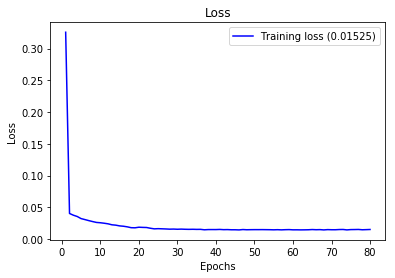

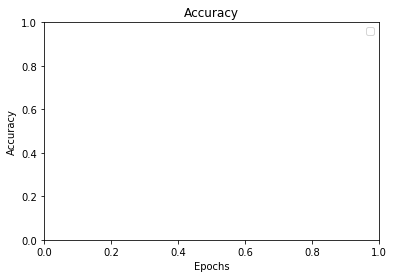

426500/426500 [==============================] - 3s 6us/step


In [5]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# this model os for dishwasher
# read data from matlab
#------------train-------------
x_input=sio.loadmat('./train/input_x_dishwasher.mat')
y_input=sio.loadmat('./train/input_y_dishwasher.mat')
x_train = x_input.get('input_x_dishwasher')
y_train = y_input.get('input_y_dishwasher')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)
#-----------valid-------------w


# model building
model = Sequential()
model.add(Conv1D(30, kernel_size=10, activation='relu', input_shape=(99,1)))
model.add(Dropout(0.5))
model.add(Conv1D(30, kernel_size=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(40, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(50, kernel_size=5, activation='relu'))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]

#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=56, callbacks=[reduce_lr])
pt.plot_history(hist)
model.save('CNN_model_dish.h5')
model = load_model('CNN_model_dish.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

np.save("y_CNN_output_dish.npy",y)
y = np.load("y_CNN_output_dish.npy")
sio.savemat('y_CNN_output_dish.mat', {'y1':y})

In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


model = load_model('CNN_model_dish.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

np.save("y_CNN_output_dish.npy",y)
y = np.load("y_CNN_output_dish.npy")
sio.savemat('y_CNN_output_dish.mat', {'y1':y})

426500/426500 [==============================] - 4s 9us/step


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 190, 30)           330       
_________________________________________________________________
dropout_19 (Dropout)         (None, 190, 30)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 183, 30)           7230      
_________________________________________________________________
dropout_20 (Dropout)         (None, 183, 30)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 178, 40)           7240      
_________________________________________________________________
dropout_21 (Dropout)         (None, 178, 40)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 174, 50)           10050     
__________

W0813 00:43:10.801226 140193297323904 legend.py:1289] No handles with labels found to put in legend.


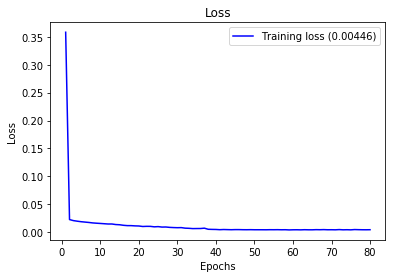

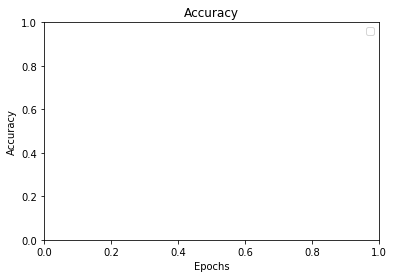

426400/426400 [==============================] - 6s 13us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# this model os for washing mac 199
# read data from matlab
#------------train-------------
x_input=sio.loadmat('./train/input_x_washing_199.mat')
y_input=sio.loadmat('./train/input_y_washing_199.mat')
x_train = x_input.get('input_x_washing_199')
y_train = y_input.get('input_y_washing_199')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)
#-----------valid-------------w


# model building
model = Sequential()
model.add(Conv1D(30, kernel_size=10, activation='relu', input_shape=(199,1)))
model.add(Dropout(0.5))
model.add(Conv1D(30, kernel_size=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(40, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(50, kernel_size=5, activation='relu'))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]
x_train = x_train[0:int(1*len(x_train)),:,:]
y_train = y_train[0:int(1*len(y_train)),:]


#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=64, callbacks=[reduce_lr])
pt.plot_history(hist)
model.save('./model/CNN_model_washing199.h5')
model = load_model('./model/CNN_model_washing199.h5')

#valid set
x_input=sio.loadmat('input_x_test_199.mat')
x_train = x_input.get('input_x_test_199')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)


sio.savemat('./newout/y_CNN_output_washing199test.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 90, 30)            330       
_________________________________________________________________
dropout_9 (Dropout)          (None, 90, 30)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 83, 30)            7230      
_________________________________________________________________
dropout_10 (Dropout)         (None, 83, 30)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 78, 40)            7240      
_________________________________________________________________
dropout_11 (Dropout)         (None, 78, 40)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 74, 50)            10050     
__________

W0813 00:11:27.507340 140193297323904 legend.py:1289] No handles with labels found to put in legend.


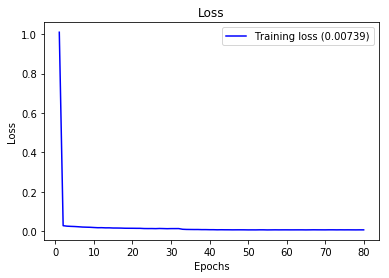

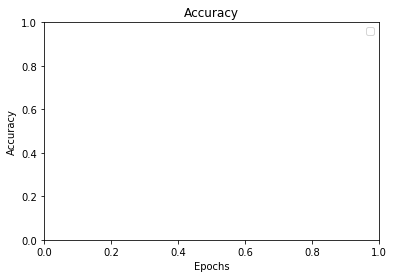

426500/426500 [==============================] - 3s 7us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# this model os for washing mac 99 length
# read data from matlab
#------------train-------------
x_input=sio.loadmat('./train/input_x_washing_99.mat')
y_input=sio.loadmat('./train/input_y_washing_199.mat')
x_train = x_input.get('input_x_washing_99')
y_train = y_input.get('input_y_washing_199')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)
#-----------valid-------------w


# model building
model = Sequential()
model.add(Conv1D(30, kernel_size=10, activation='relu', input_shape=(99,1)))
model.add(Dropout(0.5))
model.add(Conv1D(30, kernel_size=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(40, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(50, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]
x_train = x_train[0:int(1*len(x_train)),:,:]
y_train = y_train[0:int(1*len(y_train)),:]


#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=64, callbacks=[reduce_lr])
pt.plot_history(hist)
model.save('./model/CNN_model_washing99.h5')
model = load_model('./model/CNN_model_washing99.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)


sio.savemat('./newout/y_CNN_output_washing_99test.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 90, 30)            330       
_________________________________________________________________
dropout_11 (Dropout)         (None, 90, 30)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 83, 30)            7230      
_________________________________________________________________
dropout_12 (Dropout)         (None, 83, 30)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 78, 40)            7240      
_________________________________________________________________
dropout_13 (Dropout)         (None, 78, 40)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 74, 50)            10050     
__________

W0816 21:56:53.212062 140604339230592 legend.py:1289] No handles with labels found to put in legend.


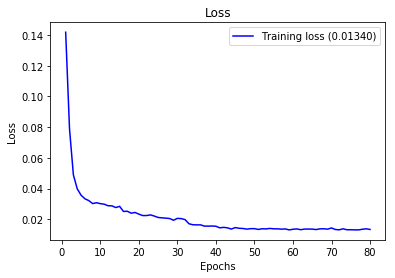

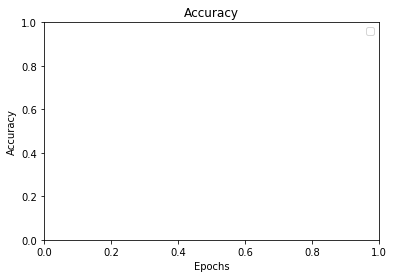

426500/426500 [==============================] - 3s 7us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# this model os for microwave
# read data from matlab
#------------train-------------
x='./train/input_x_microwave_t.mat'
y='./train/input_y_microwave_t.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x_microwave')
y_train = y_input.get('input_y_microwave')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)
#-----------valid-------------w


# model building
model = Sequential()
model.add(Conv1D(30, kernel_size=10, activation='relu', input_shape=(99,1)))
model.add(Dropout(0.5))
model.add(Conv1D(30, kernel_size=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(40, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(50, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]

#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=256, callbacks=[reduce_lr])
pt.plot_history(hist)
model.save('CNN_model_microwave.h5')
model = load_model('CNN_model_microwave.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

np.save("y_CNN_output_microwave_t.npy",y)
y = np.load("y_CNN_output_microwave_t.npy")
sio.savemat('y_CNN_output_microwave_t.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 90, 30)            330       
_________________________________________________________________
dropout_19 (Dropout)         (None, 90, 30)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 83, 30)            7230      
_________________________________________________________________
dropout_20 (Dropout)         (None, 83, 30)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 78, 40)            7240      
_________________________________________________________________
dropout_21 (Dropout)         (None, 78, 40)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 74, 50)            10050     
__________

W0727 20:09:29.569693 140255663167360 legend.py:1289] No handles with labels found to put in legend.


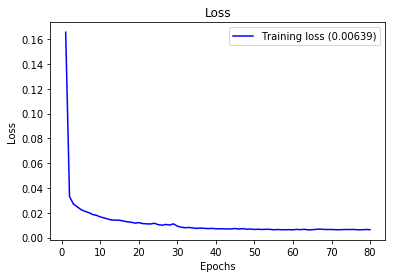

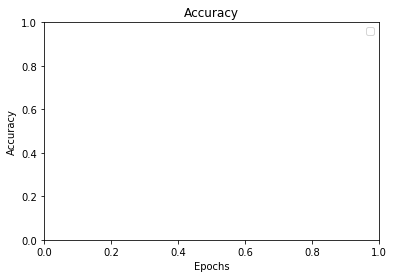

99903/99903 [==============================] - 2s 18us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# this model os for kettle
# read data from matlab
#------------train-------------
x='./train/input_x_kettle.mat'
y='./train/input_y_kettle.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x_kettle')
y_train = y_input.get('input_y_kettle')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)
#-----------valid-------------w


# model building
model = Sequential()
model.add(Conv1D(30, kernel_size=10, activation='relu', input_shape=(99,1)))
model.add(Dropout(0.5))
model.add(Conv1D(30, kernel_size=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(40, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(50, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]

#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=256, callbacks=[reduce_lr])
pt.plot_history(hist)
model.save('CNN_model_kettle.h5')
model = load_model('CNN_model_kettle.h5')

#valid set
x_input=sio.loadmat('input_x_test.mat')
x_train = x_input.get('input_x_test')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

#np.save("y_CNN_output_kettle.npy",y)
#y = np.load("y_CNN_output_kettle.npy")
sio.savemat('y_CNN_output_kettle.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 90, 30)            330       
_________________________________________________________________
dropout_9 (Dropout)          (None, 90, 30)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 83, 30)            7230      
_________________________________________________________________
dropout_10 (Dropout)         (None, 83, 30)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 78, 40)            7240      
_________________________________________________________________
dropout_11 (Dropout)         (None, 78, 40)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 74, 50)            10050     
__________

W0730 04:15:00.451995 140504312768384 legend.py:1289] No handles with labels found to put in legend.


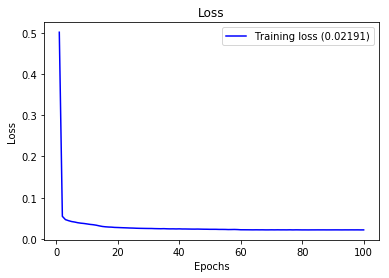

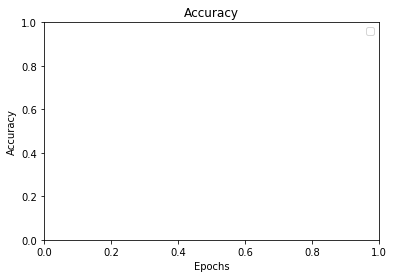

99903/99903 [==============================] - 2s 18us/step


FileNotFoundError: ignored

In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# this model os for fridge
# read data from matlab
#------------train-------------
x='./train/input_x_fridge.mat'
y='./train/input_y_fridge.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x_fridge')
y_train = y_input.get('input_y_fridge')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)
#-----------valid-------------w


# model building
model = Sequential()
model.add(Conv1D(30, kernel_size=10, activation='relu', input_shape=(99,1)))
model.add(Dropout(0.5))
model.add(Conv1D(30, kernel_size=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(40, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(50, kernel_size=5, activation='relu'))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]
x_train = x_train[0:int(0.1*len(x_train)),:,:]
y_train = y_train[0:int(0.1*len(y_train)),:]

#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
hist=model.fit(x_train, y_train, epochs=100,batch_size=512, callbacks=[reduce_lr])
pt.plot_history(hist)
model.save('./model/CNN_model_fridge.h5')
model = load_model('./model/CNN_model_fridge.h5')

#valid set
x_input=sio.loadmat('./test_out/input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

sio.savemat('./test_out/fridge_CNN_out.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 90, 30)            330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 30)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 83, 30)            7230      
_________________________________________________________________
dropout_2 (Dropout)          (None, 83, 30)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 78, 40)            7240      
_________________________________________________________________
dropout_3 (Dropout)          (None, 78, 40)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 74, 50)            10050     
__________

W0728 22:57:39.605818 139823831717760 legend.py:1289] No handles with labels found to put in legend.


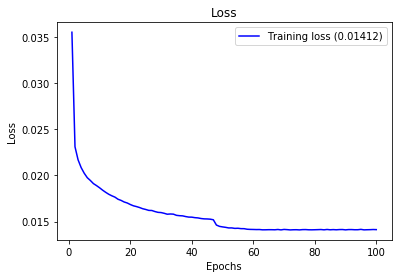

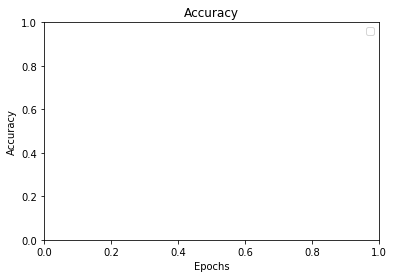

639920/639920 [==============================] - 8s 12us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# this model os for fridge total
# read data from matlab
#------------train-------------
x='input_x.mat'
y='input_fridge.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x')
y_train = y_input.get('input_app1')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)
#-----------valid-------------w


# model building
model = Sequential()
model.add(Conv1D(30, kernel_size=10, activation='relu', input_shape=(99,1)))
model.add(Dropout(0.5))
model.add(Conv1D(30, kernel_size=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(40, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(50, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]

#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
hist=model.fit(x_train, y_train, epochs=100,batch_size=1024, callbacks=[reduce_lr])
pt.plot_history(hist)
model.save('CNN_model_fridge2.h5')
model = load_model('CNN_model_fridge2.h5')

#valid set
x_input=sio.loadmat('input_x_test.mat')
x_train = x_input.get('input_x_test')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

#np.save("y_CNN_output_fridge.npy",y)
#y = np.load("y_CNN_output_fridge.npy")
sio.savemat('y_CNN_output_fridge2.mat', {'y1':y})

x_input=sio.loadmat('input_x.mat')
x_train = x_input.get('input_x')
x_train = np.transpose(x_train)
x_train = x_train[0:int(0.8*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)


sio.savemat('y_CNN_t_fridge2.mat', {'y1':y})

In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import model_plot as pt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


model = load_model('./model/CNN_model_fridge.h5')

#valid set
x_input=sio.loadmat('./test_out/input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

sio.savemat('./test_out/fridge_CNN_out.mat', {'y1':y})



99903/99903 [==============================] - 2s 18us/step
